In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
df = pd.read_csv('lending_club_loan_data.csv')
df.head() # Target variable is not.fully.paid

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [35]:
df.shape

(9578, 14)

In [36]:
df.isnull().sum() # No missing values

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [37]:
df.info() # one object-type variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [38]:
df['not.fully.paid'].value_counts() # Imbalanced dataset

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

<Axes: xlabel='not.fully.paid'>

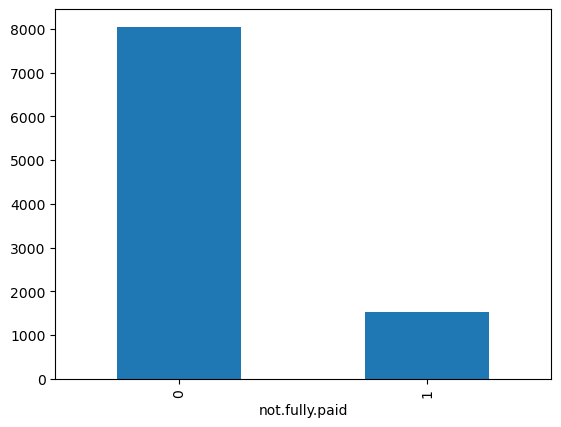

In [39]:
df['not.fully.paid'].value_counts().plot(kind='bar')

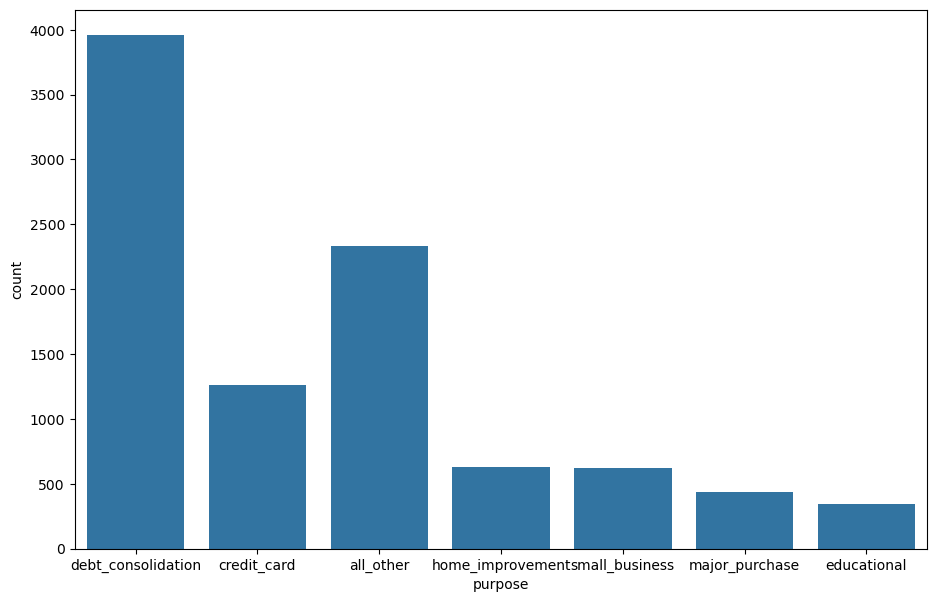

In [40]:
# Plotting categorical column i.e. purpose of taking the loan
plt.figure(figsize = (11,7))
sns.countplot(x=df['purpose'])
plt.show()

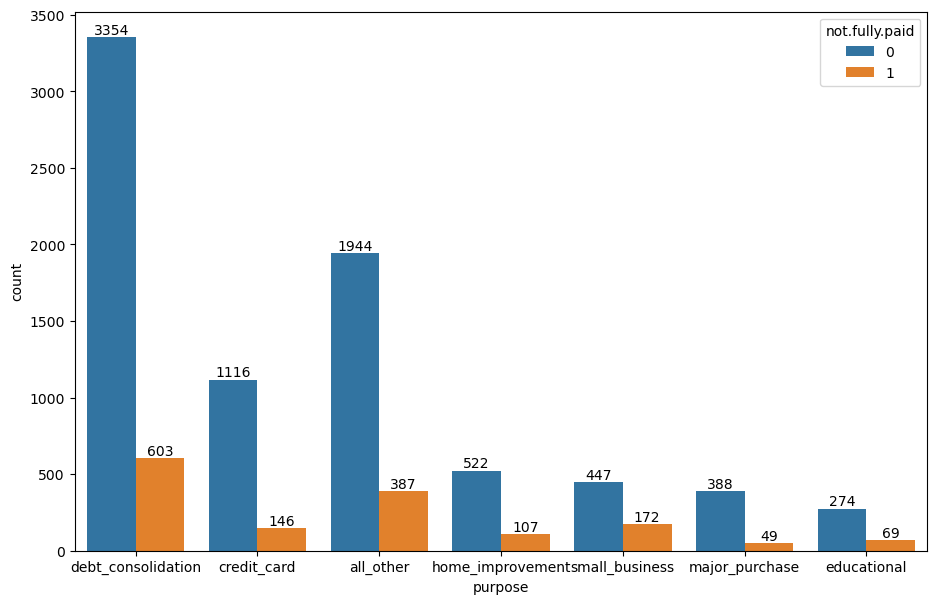

In [41]:
plt.figure(figsize = (11,7))
ax = sns.countplot(x='purpose', hue = 'not.fully.paid', data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.show() # maximum loan defaulters are under the purpose:debt_consolidation

In [42]:
#printing imbalanced dataset
not_fully_paid_0 = df[df['not.fully.paid'] == 0] # Not loan defaulters
not_fully_paid_1 = df[df['not.fully.paid'] == 1] # Loan defaulters

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [43]:
#handling imbalanced data
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045) #(up)sampling loan defaultersm(with replacement)
new_df = pd.concat([not_fully_paid_0, df_minority_upsampled])

new_df = shuffle(new_df) # shuffling the concatenated data
new_df.shape

(16090, 14)

In [44]:
new_df['not.fully.paid'].value_counts()  #imbalanced data handled

not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

In [45]:
# Label encoding the categorical variable
le = LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtypes == 'object':
        
        new_df[i] = le.fit_transform(new_df[i])

In [46]:
new_df.info() # no object type variable

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 4578 to 222
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      16090 non-null  int64  
 1   purpose            16090 non-null  int32  
 2   int.rate           16090 non-null  float64
 3   installment        16090 non-null  float64
 4   log.annual.inc     16090 non-null  float64
 5   dti                16090 non-null  float64
 6   fico               16090 non-null  int64  
 7   days.with.cr.line  16090 non-null  float64
 8   revol.bal          16090 non-null  int64  
 9   revol.util         16090 non-null  float64
 10  inq.last.6mths     16090 non-null  int64  
 11  delinq.2yrs        16090 non-null  int64  
 12  pub.rec            16090 non-null  int64  
 13  not.fully.paid     16090 non-null  int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1.8 MB


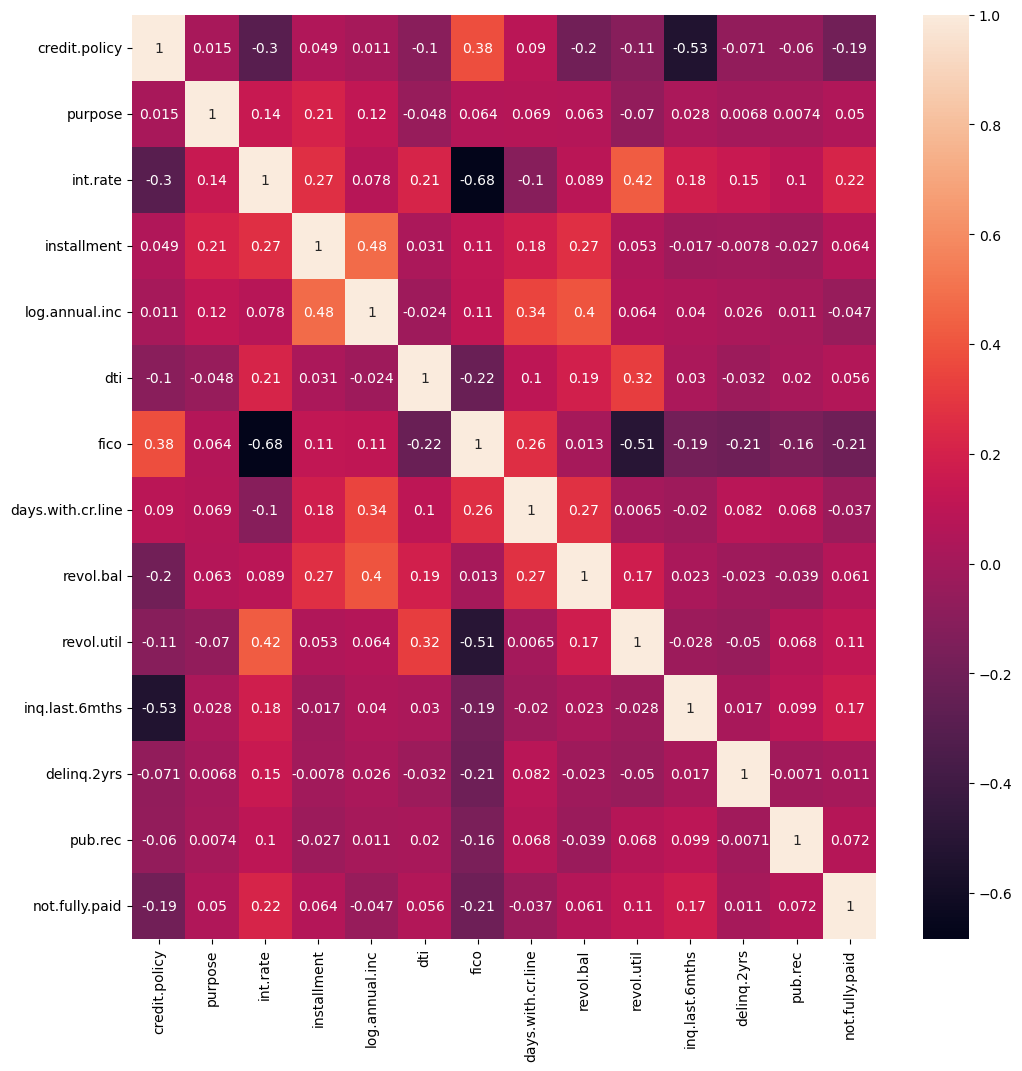

In [47]:
# Correlation heatmap
plt.figure(figsize = (12,12))
sns.heatmap(new_df.corr(numeric_only = True), annot = True)
plt.show()

In [48]:
# Feature engineering
new_df.corr().abs()['not.fully.paid'].sort_values(ascending = False, kind='mergesort') # Computing correlation w.r.t. the target variable

not.fully.paid       1.000000
int.rate             0.217433
fico                 0.207506
credit.policy        0.190808
inq.last.6mths       0.167327
revol.util           0.113982
pub.rec              0.071553
installment          0.064339
revol.bal            0.060947
dti                  0.055571
purpose              0.050147
log.annual.inc       0.047017
days.with.cr.line    0.036766
delinq.2yrs          0.010810
Name: not.fully.paid, dtype: float64

In [49]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [50]:
# Choosing input variables keeping threshold value of correlation as 0.06
X = new_df[["int.rate", "fico", "credit.policy", "inq.last.6mths", "revol.util", "pub.rec", "installment", "revol.bal"]]
y = new_df["not.fully.paid"] # Output 
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (16090, 8)
y shape: (16090,)


In [51]:
X # non-scaled data

,int.rate,fico,credit.policy,inq.last.6mths,revol.util,pub.rec,installment,revol.bal
4578,0.1218,722,1,1,5.4,0,666.00,2292
6168,0.1322,717,1,0,97.7,0,169.01,14953
7945,0.0964,707,0,7,36.7,0,385.19,6306
5101,0.1426,707,1,0,7.7,0,445.98,69
2722,0.1442,697,1,2,84.9,0,687.66,58981
...,...,...,...,...,...,...,...,...
705,0.1292,712,1,1,52.6,0,377.79,8837
5449,0.1496,677,1,0,84.2,0,528.34,22240
3100,0.0963,752,1,0,23.4,0,385.14,4087
834,0.1166,702,1,3,46.7,0,528.84,14958


In [52]:
# Creating training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (12872, 8)
X_test shape: (3218, 8)
y_train shape: (12872,)
y_test shape: (3218,)


In [53]:
# Apply Standard Scaling to normalize training and test input datasets
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # learn parameters and transform
X_test = sc.transform(X_test) # transform basis what was learned

In [54]:
X_train # scaled data

array([[ 0.06683754, -0.64219451,  0.57723066, ..., -0.27345073,
        -0.87682826, -0.37691926],
       [-1.73453235,  2.59712081,  0.57723066, ..., -0.27345073,
        -0.06831558, -0.4059751 ],
       [ 0.59533862, -0.10230863,  0.57723066, ..., -0.27345073,
         0.90883096,  0.01456161],
       ...,
       [ 0.2082674 ,  0.57254873,  0.57723066, ..., -0.27345073,
         1.6346938 , -0.34705123],
       [ 0.64000068, -0.77716599, -1.73240971, ..., -0.27345073,
        -0.24897122, -0.10708514],
       [ 0.17104902, -1.45202335, -1.73240971, ...,  3.37029443,
        -0.90589658, -0.2425917 ]])

In [55]:
X_test # scaled data

array([[-0.80035086,  0.57254873,  0.57723066, ..., -0.27345073,
        -1.08190318, -0.09972293],
       [ 0.02589731, -0.2372801 ,  0.57723066, ..., -0.27345073,
         0.06791578, -0.02374284],
       [ 0.18593637, -0.10230863,  0.57723066, ...,  3.37029443,
         1.63182923,  0.03945164],
       ...,
       [-1.73453235,  1.11243462,  0.57723066, ..., -0.27345073,
        -1.1867182 , -0.39004548],
       [-1.10181979,  0.7075202 ,  0.57723066, ..., -0.27345073,
        -0.37064494, -0.11318975],
       [ 0.33853176, -0.50722304, -1.73240971, ..., -0.27345073,
        -0.34350198, -0.23415529]])

In [56]:
# Create ANN Deep Learning model
model = keras.Sequential()

# Input layer
model.add(keras.layers.Dense(18, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_dim = 8)) # 8 inputs, 18 nodes (weights) and 18 biases i.e. 8*18+18 = 162 parameters learned
model.add(keras.layers.Dropout(0.2))

# Hidden layer
model.add(keras.layers.Dense(10, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))

# Hidden layer
model.add(keras.layers.Dense(10, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))

# Output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 18)                  │             162 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 473 (1.85 KB)

 Trainable params: 473 (1.85 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Compile the model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
# Halt training when the model performance stops improving (prevent overfitting)
early_stopping = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, 
                                               restore_best_weights =True )
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=250,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5149 - loss: 1.0052 - val_accuracy: 0.5926 - val_loss: 0.9509
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5561 - loss: 0.9201 - val_accuracy: 0.6001 - val_loss: 0.8813
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5719 - loss: 0.8574 - val_accuracy: 0.5911 - val_loss: 0.8280
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5755 - loss: 0.8110 - val_accuracy: 0.6013 - val_loss: 0.7868
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5796 - loss: 0.7753 - val_accuracy: 0.6066 - val_loss: 0.7557
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5847 - loss: 0.7482 - val_accuracy: 0.6069 - val_loss: 0.7319
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5881 - loss: 0.7282 - val_accuracy: 0.6088 - val_loss: 0.7135
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5912 - loss: 0.7144 - val_accuracy: 0.6088 - val_loss

In [59]:
# Accuracy and loss values
score = model.evaluate(X_train, y_train)
print(score)
print("Training accuracy",score[1])
print("Training loss", score[0])

score = model.evaluate(X_test, y_test)
print(score) # No model overfitting as test scores are better 
print("Testing accuracy",score[1])
print("Testing loss", score[0])

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6064 - loss: 0.6658
[0.6658247709274292, 0.6064325571060181]
Training accuracy 0.6064325571060181
Training loss 0.6658247709274292
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6078 - loss: 0.6632
[0.6631687879562378, 0.6078309416770935]
Testing accuracy 0.6078309416770935
Testing loss 0.6631687879562378


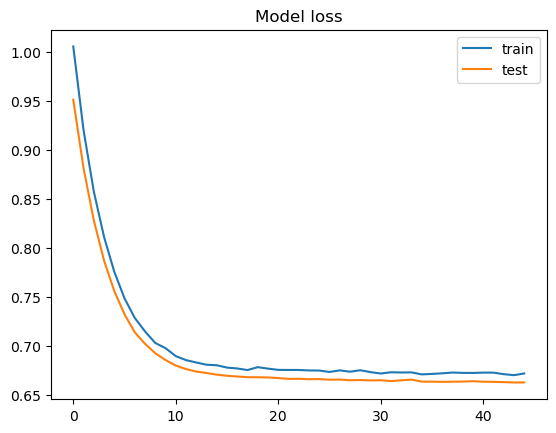

In [60]:
# Plot the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['train', 'test'], loc = 'best')
plt.show()

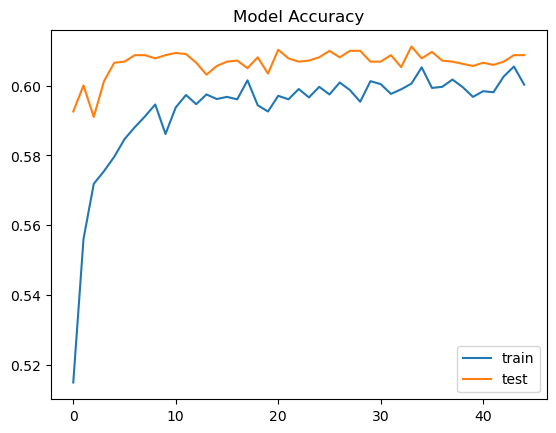

In [61]:
# Plot the Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train', 'test'], loc = 'best')
plt.show()

In [62]:
# Model predictions
predictions =(model.predict(X_test)>0.5).astype("int32")
              
predictions

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [63]:
accuracy_score(y_test, predictions)

0.6078309509011809

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60      1590
           1       0.61      0.63      0.62      1628

    accuracy                           0.61      3218
   macro avg       0.61      0.61      0.61      3218
weighted avg       0.61      0.61      0.61      3218

